In [297]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.constants as const
import scipy.integrate as spi
x,y,z,n,L,nx,ny,nz,Lx,Ly,Lz=sp.symbols('x y z n L nx ny nz Lx Ly Lz', real=True)
hbar=1
nPoints = 100
L = 5
m = 1
a = L/(nPoints+1)
t = (hbar**2)/(2*m*a*a)
psi1D=sp.lambdify('n,L,x',(sp.sqrt(2/L) * sp.sin(n * sp.pi * x/L)),'numpy')
Energy1D = sp.lambdify('n,L',((hbar*np.pi*n/L)**2)/(2*m))
def Energy1DPIB(n):
    return Energy1D(n,L)

Exact Eigenvalue for n=100: 1973.92088021787
Eigenvalue computed by finite difference method: 815.8826238264215


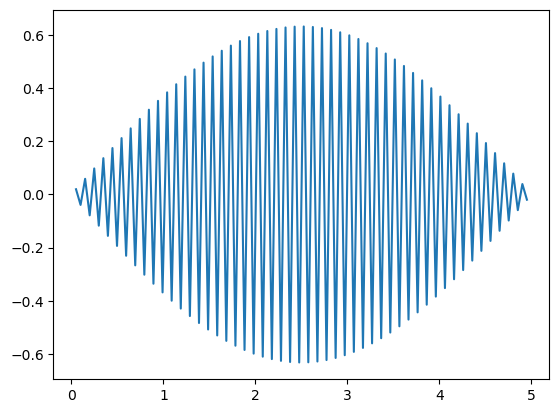

In [298]:
#Problem 1: 
hMatr = np.zeros((nPoints,nPoints))
for i in range(nPoints):
    hMatr[i,i] =2*t
for i in range(nPoints-1):
    hMatr[i,i+1]=-1*t
for i in range(1,nPoints):
    hMatr[i,i-1]=-1*t
        
eigenvalues, eigenvectors = np.linalg.eig(hMatr)
desired_eigenvalue_index = np.where(eigenvalues==np.sort(eigenvalues)[99])[0][0]  
estate100 = eigenvectors[:, desired_eigenvalue_index]/np.sqrt(a)
#print("Eigenvector for n=100:",estate100)
print("Exact Eigenvalue for n=100:",Energy1DPIB(100))
print("Eigenvalue computed by finite difference method:",np.sort(eigenvalues)[99])
x = []
for i in range(0,nPoints):
    x.append((i+1)*a)
plt.plot(x,estate100)
plt.show()


Improving accuracy, lets take nPoints=1000
Exact Eigenvalue for n=100: 1973.92088021787
Eigenvalue computed by finite difference method: 1957.7715567042155


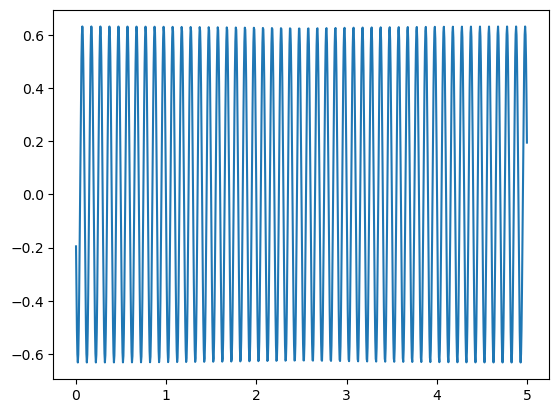

In [299]:
#Problem 1 contd:
print("Improving accuracy, lets take nPoints=1000")
nPoints=1000
a = L/(nPoints+1)
t = (hbar**2)/(2*m*a*a)
HMatr=np.zeros((nPoints,nPoints))
for i in range(nPoints):
    HMatr[i,i] =2*t
for i in range(nPoints-1):
    HMatr[i,i+1]=-1*t
for i in range(1,nPoints):
    HMatr[i,i-1]=-1*t
eigenvalues, eigenvectors = np.linalg.eig(HMatr)   
desired_eigenvalue_index = np.where(eigenvalues==np.sort(eigenvalues)[99])[0][0]  # Change this to the index you want
estate100 = eigenvectors[:, desired_eigenvalue_index]/np.sqrt(a)
print("Exact Eigenvalue for n=100:",Energy1DPIB(100))
print("Eigenvalue computed by finite difference method:",np.sort(eigenvalues)[99])  
x = []
for i in range(0,nPoints):
    x.append((i+1)*a)
plt.plot(x,estate100)
plt.show()



VALUES COMPUTED THROUGH FINITE DIFFERENCE METHOD:
For n= 1, <x>: 2.5000000000252447 | <x^2>: 7.066818537928945
For n= 2, <x>: 2.499999999994013 | <x^2>: 8.016704634396929
For n= 3, <x>: 2.500000000010343 | <x^2>: 8.192609467120574
For n= 4, <x>: 2.5000000000031735 | <x^2>: 8.254176158483657
For n= 5, <x>: 2.499999999989952 | <x^2>: 8.282672741256443

ACTUAL VALUES:
For n= 1, <x>: 2.50000000000000 | <x^2> 7.06681853780411
For n= 2, <x>: 2.50000000000000 | <x^2> 8.01670463445103
For n= 3, <x>: 2.50000000000000 | <x^2> 8.19260946716342
For n= 4, <x>: 2.50000000000000 | <x^2> 8.25417615861276
For n= 5, <x>: 2.50000000000000 | <x^2> 8.28267274151217


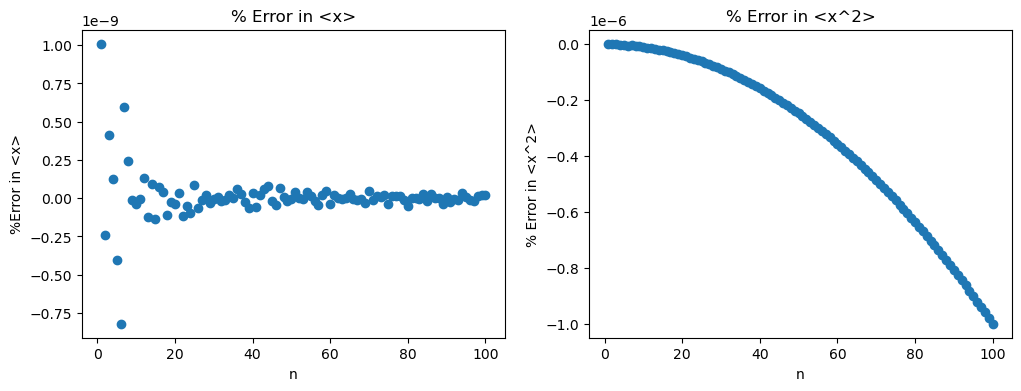

In [300]:
#PROBLEM 2: (Note: now nPoints=1000)
x=np.array(x)
Cexp_x = []
Cexp_xsq =[]
Aexp_x = []
Aexp_xsq = []
print("VALUES COMPUTED THROUGH FINITE DIFFERENCE METHOD:")
for i in range(100):
    desired_eigenvalue_index = np.where(eigenvalues==np.sort(eigenvalues)[i])[0][0]  # Change this to the index you want
    estate = eigenvectors[:, desired_eigenvalue_index]/np.sqrt(a)
    if i<5:
        print("For n=",i+1,end=', ')
        print("<x>:",sum((estate**2)*x*a),end=' | ')
        print("<x^2>:",sum((estate**2)*x*x*a))
    Cexp_x.append(sum((estate**2)*x*a))
    Cexp_xsq.append(sum((estate**2)*x*x*a))
def exp(n,i):
    x=sp.symbols('x',real=True)
    expression = ((sp.sqrt(2/L)*sp.sin(n*np.pi*x/L))**2)*(x**i)
    return sp.integrate(expression,(x,0,L)).evalf()
print("\nACTUAL VALUES:")
for j in range(100):
    if j<5:
        print("For n=",j+1,end=', ')
        print("<x>:",exp(j+1,1),end=' | ')
        print("<x^2>",exp(j+1,2))
    Aexp_x.append(exp(j+1,1))
    Aexp_xsq.append(exp(j+1,2))
Cexp_x = np.array(Cexp_x)
Cexp_xsq =np.array(Cexp_xsq)
Aexp_x = np.array(Aexp_x)
Aexp_xsq = np.array(Aexp_xsq)
fig,axs= plt.subplots(1,2, figsize=(12,4))
N= np.linspace(1,100,100)
axs[0].scatter(N,(Cexp_x - Aexp_x)*100/Aexp_x)
axs[0].set_title("% Error in <x>")
axs[0].set_xlabel("n")
axs[0].set_ylabel("%Error in <x>")
axs[1].set_title("% Error in <x^2>")
axs[1].scatter(N,(Cexp_xsq - Aexp_xsq)*100/Aexp_xsq)
axs[1].set_xlabel("n")
axs[1].set_ylabel("% Error in <x^2>")
plt.show()


For b=0.010000 a.u.,Eigenvalue corresponding to n=1: 0.22225478510792018 | <x>: 2.4725752879848626
For b=0.100000 a.u.,Eigenvalue corresponding to n=1: 0.43384448851067137 | <x>: 2.2323202557023176
For b=1.000000 a.u.,Eigenvalue corresponding to n=1: 1.8557610145195547 | <x>: 1.2371154344156743
For b=10.000000 a.u.,Eigenvalue corresponding to n=1: 8.613599641172097 | <x>: 0.5742358623290393


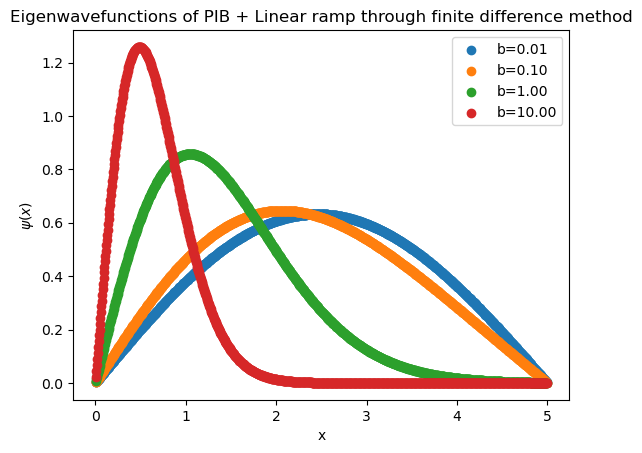

OBSERVATION: We can see that the peak is shifting towards left as the value of b increases


In [301]:
for b in [0.01,0.1,1,10]:
    V= b*x
    hMatr=np.zeros((nPoints,nPoints))
    for i in range(nPoints):
        hMatr[i,i] = V[i]+2*t
    for i in range(nPoints-1):
        hMatr[i,i+1]=-1*t
    for i in range(1,nPoints):
        hMatr[i,i-1]=-1*t
    eigenvalues, eigenvectors = np.linalg.eig(hMatr)
    print("For b=%f a.u.,Eigenvalue corresponding to n=1:"%(b),np.sort(eigenvalues)[0],end=' | ')
    desired_eigenvalue_index = np.where(eigenvalues==np.sort(eigenvalues)[0])[0][0]  # Change this to the index you want
    estate1 = eigenvectors[:, desired_eigenvalue_index]/np.sqrt(a)
    print("<x>:",sum(estate1*x*estate1*a))
    plt.scatter(x, estate1, label='b={:.2f}'.format(b))
    plt.legend()
plt.xlabel('x')
plt.ylabel('$\psi(x)$')
plt.title('Eigenwavefunctions of PIB + Linear ramp through finite difference method')
plt.show()
print("OBSERVATION: We can see that the peak is shifting towards left as the value of b increases")  

First five Eigenvalues are: [ 4.9996881  14.99844045 24.99594493 34.99220133 44.98720941]


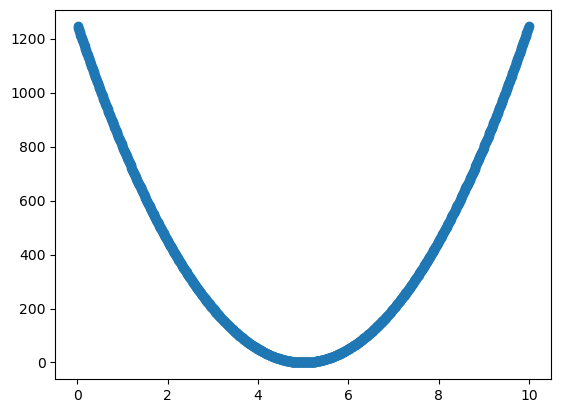

Zero point Energy of the first eigenstate: 4.998440600875797


In [302]:
k=100
L=10
x0 = L/2
a = L/(nPoints+1)
t = (hbar**2)/(2*m*a*a)
x = []
for i in range(0,nPoints):
    x.append((i+1)*a)
x=np.array(x)
V= (k/2)*(x-x0)**2
hMatr=np.zeros((nPoints,nPoints))
for i in range(nPoints):
    hMatr[i,i] = V[i]+2*t
for i in range(nPoints-1):
    hMatr[i,i+1]=-1*t
for i in range(1,nPoints):
    hMatr[i,i-1]=-1*t
eigenvalues, eigenvectors = np.linalg.eig(hMatr)
print("First five Eigenvalues are:",np.sort(eigenvalues)[:5])
plt.scatter(x,V)
plt.show()
print("Zero point Energy of the first eigenstate:",np.abs(min(V)-np.sort(eigenvalues)[0]))

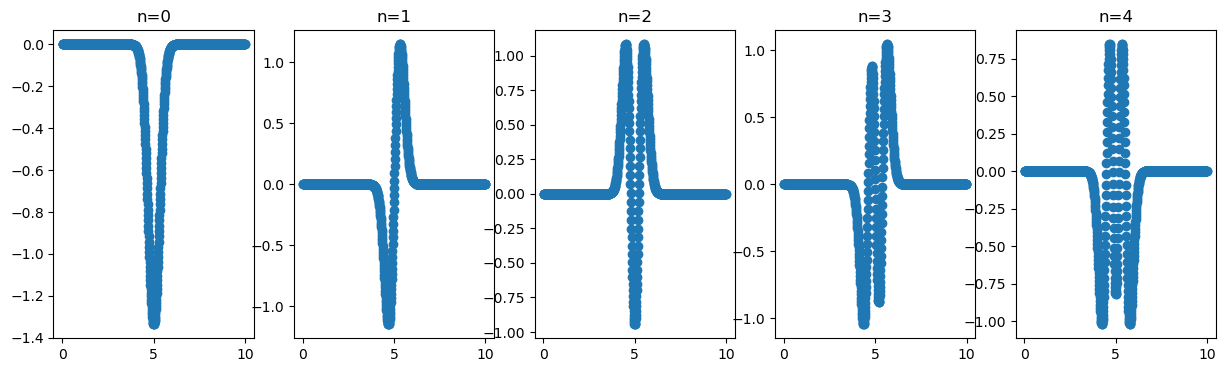

In [303]:
fig,axs= plt.subplots(1,5, figsize=(15,4))
for i in range(5):
    desired_eigenvalue_index = np.where(eigenvalues==np.sort(eigenvalues)[i])[0][0]  # Change this to the index you want
    estate = eigenvectors[:, desired_eigenvalue_index]/np.sqrt(a)
    axs[i].scatter(x,estate)
    axs[i].set_title('n='+str(i))
plt.show()

In [304]:
Diff_eigenenergies = []
Zeropt_energy=np.abs(min(V)-np.sort(eigenvalues)[0])
for i in range(4):
    Diff_eigenenergies.append(np.sort(eigenvalues)[i+1]-np.sort(eigenvalues)[i])
print(Diff_eigenenergies)
print(Zeropt_energy)

[9.998752340572135, 9.997504486469888, 9.996256398648335, 9.99500807694929]
4.998440600875797


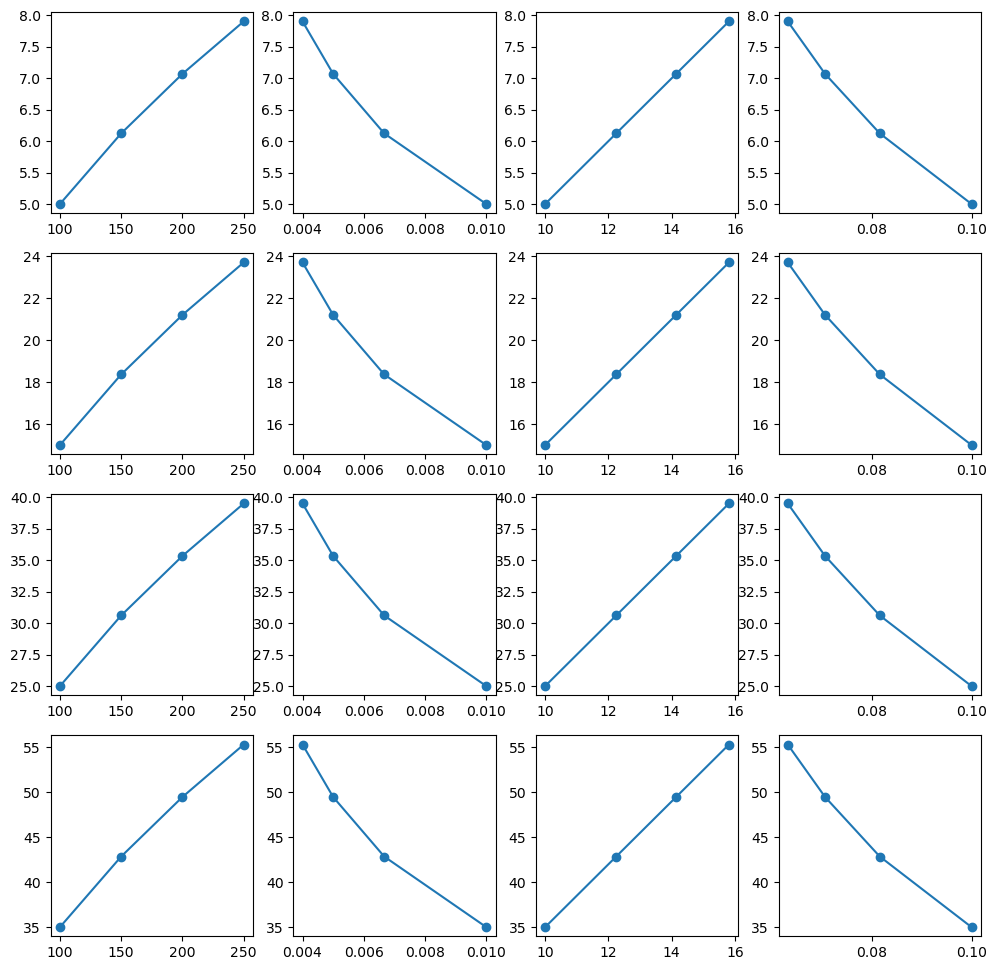

In [305]:
n1=[]
n2=[]

    #print("For k=%f,n=1 eigenenergy:"%(k),np.sort(eigenvalues)[0])
    #print("For k=%f,n=2 eigenenergy:"%(k),np.sort(eigenvalues)[1])
    #n2.append(np.sort(eigenvalues)[1])
fig, axs=plt.subplots(4,4,figsize=(12,12))


n=[]
for i in range(4):
    kvals=[100,150,200,250]
    kvals=np.array(kvals)
    for k in kvals:
        V= (k/2)*(x-x0)**2
        hMatr=np.zeros((nPoints,nPoints))
        for m in range(nPoints):
            hMatr[m,m] = V[m]+2*t
        for m in range(nPoints-1):
            hMatr[m,m+1]=-1*t
        for m in range(1,nPoints):
            hMatr[m,m-1]=-1*t
        eigenvalues, eigenvectors = np.linalg.eig(hMatr)
        n.append(np.sort(eigenvalues)[i])
    
    axs[i,0].plot(kvals,n)
    axs[i,1].plot(1/kvals,n)
    axs[i,2].plot(kvals**0.5,n)
    axs[i,3].plot(1/kvals**0.5,n)
    axs[i,0].scatter(kvals,n)
    axs[i,1].scatter(1/kvals,n)
    axs[i,2].scatter(kvals**0.5,n)
    axs[i,3].scatter(1/kvals**0.5,n)
    n=[]
plt.show()


It is observed that $$ {Eigenergy \propto \sqrt k} $$
$$Eigenergy \propto {n+ 1\over2}$$


In [306]:
import scipy.constants as const
De = (7.61e-19)/const.physical_constants["Hartree energy"][0]
beta = (0.0193e12)*const.physical_constants["Bohr radius"][0]
x0 = (74.1e-12)/const.physical_constants["Bohr radius"][0]
mew = 1.660e-27/const.m_e
L= 400e-12/const.physical_constants["Bohr radius"][0]

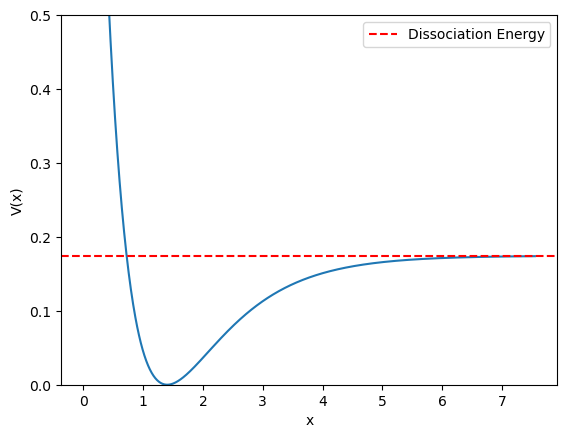

In [307]:
a = L/(nPoints+1)
t = (hbar**2)/(2*m*a*a)
x=[]
for i in range(nPoints):
    x.append(a*(i+1))
x=np.array(x)
V = De*(1-np.exp(-beta*(x-x0)))**2
plt.plot(x,V)
plt.xlabel("x")
plt.ylim(0,0.5)
plt.ylabel("V(x)")
plt.axhline(y=De, color='red', linestyle='--', label='Dissociation Energy')
plt.legend()
plt.show()

No. of bound states: 17


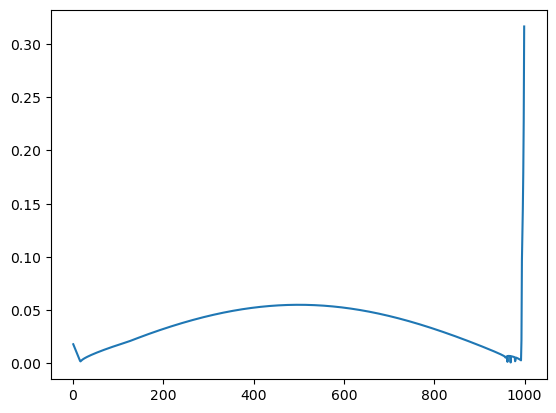

In [308]:
hMatr=np.zeros((nPoints,nPoints))
for m in range(nPoints):
    hMatr[m,m] = V[m]+2*t
for m in range(nPoints-1):
    hMatr[m,m+1]=-1*t
for m in range(1,nPoints):
    hMatr[m,m-1]=-1*t
eigenvalues, eigenvectors = np.linalg.eig(hMatr)
print("No. of bound states:", len(eigenvalues[eigenvalues<=De]))
differences=[]
for i in range(999):
    differences.append( np.sort(eigenvalues)[i+1]-np.sort(eigenvalues)[i])
plt.plot(np.linspace(1,999,999),differences)


So differences first increase, then decrease in case of morse potential

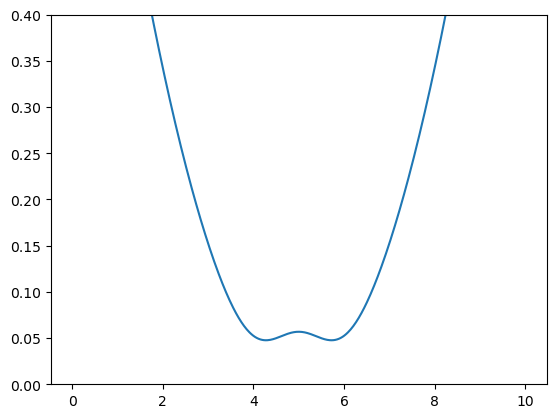

In [312]:
L = 10
nPoints = 500
a = L/(nPoints+1)
t = (hbar**2)/(2*m*a*a)
k=0.07598
b=0.05684
x0=5
c=1.3696
mew= 4668
a = L/(nPoints+1)
x=[]
for i in range(nPoints):
    x.append(a*(i+1))
x=np.array(x)
V= (0.5*k*(x-x0)**2) + b*np.exp(-c*(x-x0)**2)
plt.ylim(0,0.4)
plt.plot(x,V)
plt.show()

First four eigenvalues are: [0.05569569 0.06439521 0.08289448 0.10158461]


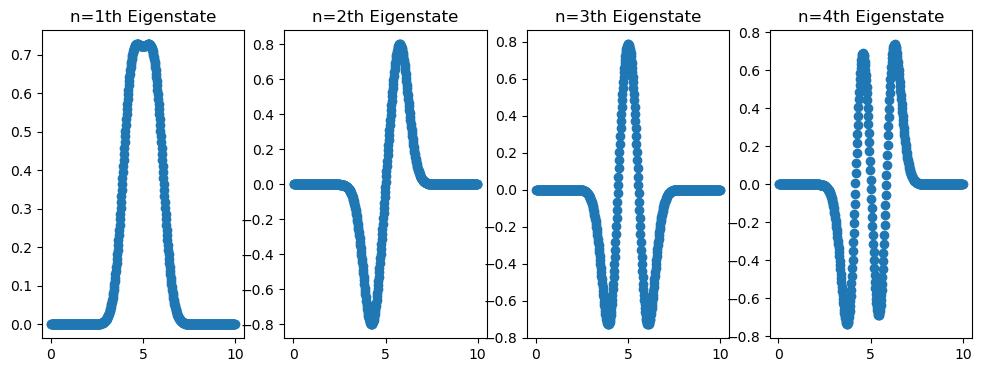

In [310]:
hMatr=np.zeros((nPoints,nPoints))
for m in range(nPoints):
    hMatr[m,m] = V[m]+2*t
for m in range(nPoints-1):
    hMatr[m,m+1]=-1*t
for m in range(1,nPoints):
    hMatr[m,m-1]=-1*t
eigenvalues, eigenvectors = np.linalg.eig(hMatr)
print("First four eigenvalues are:",np.sort(eigenvalues)[:4])
fig,axs = plt.subplots(1,4,figsize=(12,4))
for i in range(4):
    desired_eigenvalue_index = np.where(eigenvalues==np.sort(eigenvalues)[i])[0][0]
    estate = eigenvectors[:, desired_eigenvalue_index]/np.sqrt(a)
    axs[i].set_title('n='+str(i+1)+'th Eigenstate')
    axs[i].scatter(x, estate)
plt.show()

In [314]:
L = 10
nPoints = 500
a = L/(nPoints+1)
t = (hbar**2)/(2*m*a*a)
x=[]
for i in range(nPoints):
    x.append(a*(i+1))
x=np.array(x)
for l in [0,1]:
    V = (l*(l+1)*(hbar**2) /(2*m*x*x))-(1/x)
    hMatr=np.zeros((nPoints,nPoints))
    for m in range(nPoints):
        hMatr[m,m] = V[m]+2*t
    for m in range(nPoints-1):
        hMatr[m,m+1]=-1*t
    for m in range(1,nPoints):
        hMatr[m,m-1]=-1*t
    eigenvalues, eigenvectors = np.linalg.eig(hMatr)
    print("For l=%d, lowest eigenvalue is:"%(l),np.sort(eigenvalues)[0])

For l=0, lowest eigenvalue is: -45.321798716432866
For l=1, lowest eigenvalue is: -40.33603262236651
